[View in Colaboratory](https://colab.research.google.com/github/JacksonIsaac/colab_notebooks/blob/master/kaggle_cats_vs_dogs_redux.ipynb)

# Environment Setup

In [4]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Hit:1 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:2 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.d

Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [8]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
#!pip install --upgrade -q tensorflow

In [6]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p kaggle-drive
!google-drive-ocamlfuse kaggle-drive

In [0]:
!pip install -q keras
#!pip install -q tensorflow-gpu
!pip install -q kaggle

In [8]:
!ls /content/kaggle-drive

2015 CCSP Course Content & Duration!.pdf
2018 rent receipt.pdf
2672.pdf
5 lb. Book of GRE Practice Problems - Manhattan Prep.pdf
Aadhar attested for sbi.pdf
Amrita Offer List with BU details.xlsx
Amrita Offer List with BU details.xlsx.ods
Analysing Smart Home Data using Parallel Temporal Pattern Mining.pdf
Android
Apply masters in informatics.odt
Awesome Tutorial site.odt
AWS IoT.odt
bachelor_thesis
Backup_TwitterKafka_2.zip
bashrc.txt
bashrc.txt.odt
Berlin
Book1.ods
Burda - Pitch presentation notes.odt
channel_3.csv
channel_3.csv.ods
Chennai-dutyfree2018.pdf
CIR
Code
Colab Notebooks
computer_science_be003.pdf-36.pdf
Copy of ContributionDB.ods
Copy of cse.xlsx.ods
Copy of Gmail Scheduler v2 - From ctrlq.org.ods
Copy of Jackson GSoC 2014 Proposal - GNOME-Music.odt
Copy of Problem Solving using TopCoder.ods
Cover Letter for German Visa.odt
C-RAN.odt
CSE_A _Seminar_Schedule.ods
Debian Bug Fixing.odt
Dharmashala Expenses.ods
Downloads
ebook.odt
ecofootprin.png
Ecological footprint.odt
Enro

# Kaggle Setup

In [11]:
#!kaggle competitions list

#!kaggle datasets list -s dogs

#!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -w

test.zip: Downloaded 271MB of 271MB to .
train.zip: Downloaded 544MB of 544MB to .
sample_submission.csv: Downloaded 111KB of 111KB to .


In [0]:
!wget http://files.fast.ai/data/dogscats.zip
!unzip dogscats.zip

In [31]:
!ls dogscats

models	sample	test1  train  valid


# Training

In [0]:
# The following is a quiet installation and will not output anything on
# stdout. It may take some time to complete the installation.
# If you want to see what is happening behind the scenes remove
# -q from the command.
!pip install -q bcolz theano sympy pillow scikit-learn

In [0]:
!cp /content/kaggle-drive/Colab\ Notebooks/Fast_Ai_Part1_2017/*.py /usr/local/lib/python3.6/dist-packages/

In [0]:
%matplotlib inline

In [0]:
#!ls dogscats/sample
path = "dogscats/sample/"
batch_size=4

In [0]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

from importlib import reload

In [124]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving vgg16.py to vgg16 (1).py


In [23]:
import utils; reload(utils)
from utils import plots

Using TensorFlow backend.


In [0]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [0]:
path = "dogscats/"

# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=64

In [27]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

40960/35363 [==================================] - 0s 2us/step
Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
imgs,labels = next(batches)

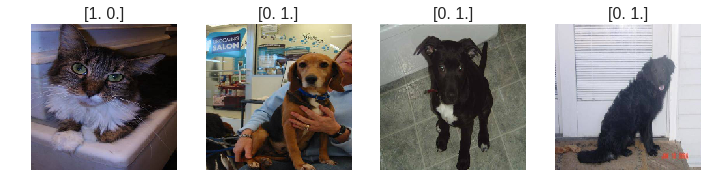

In [16]:
plots(imgs, titles=labels)

In [17]:
vgg.predict(imgs, True)

(array([0.6288, 0.3322, 0.1786, 0.4155], dtype=float32),
 array([283, 151, 195, 199]),
 ['Persian_cat', 'Chihuahua', 'Boston_bull', 'Scotch_terrier'])

In [0]:
#vgg.finetune(batches)
vgg.fit(batches, val_batches, path='/content/kaggle-drive/kaggle_competitions/run' + epoch_time + '_dogscats.h5', epochs=3)

In [0]:
import time
epoch_time = str(int(time.time()))

In [0]:
vgg.model.save_weights('/content/kaggle-drive/kaggle_competitions/run' + epoch_time + '_dogscats_weights.h5')

In [24]:
#!ls .keras/models
#!tail .keras/models/vgg16.h5

imagenet_class_index.json  vgg16.h5


In [0]:
#from keras.models import load_model
#model = load_model('/content/kaggle-drive/kaggle_competitions/run1_dogscats.h5')

In [28]:
#!ls /content/kaggle-drive/kaggle_competitions/

2015 CCSP Course Content & Duration!.pdf
2672.pdf
5 lb. Book of GRE Practice Problems - Manhattan Prep.pdf
Aadhar attested for sbi.pdf
AC Meter Reading.ods
Amrita Offer List with BU details.xlsx
Amrita Offer List with BU details.xlsx.ods
Analysing Smart Home Data using Parallel Temporal Pattern Mining.pdf
Android
Angular Public
Apply masters in informatics.odt
Awesome Tutorial site.odt
AWS IoT.odt
bachelor_thesis
Backup_TwitterKafka_2.zip
bashrc.txt
bashrc.txt.odt
Berlin
Book1.ods
Burda - Pitch presentation notes.odt
channel_3.csv
channel_3.csv.ods
Chennai-dutyfree2018.pdf
CIR
Code
Colab Notebooks
computer_science_be003.pdf-36.pdf
Copy of ContributionDB.ods
Copy of cse.xlsx.ods
Copy of Gmail Scheduler v2 - From ctrlq.org.ods
Copy of Jackson GSoC 2014 Proposal - GNOME-Music.odt
Copy of Problem Solving using TopCoder.ods
Cover Letter for German Visa.odt
C-RAN.odt
CSE_A _Seminar_Schedule.ods
Debian Bug Fixing.odt
Debian_packaging_Main
Dharmashala Expenses.ods
Discrete Maths Tutorial
Downl

In [24]:
#model.fit(batches, val_batches, epochs=1)

AttributeError: ignored

In [0]:
# Kill the runtime VM and reset for new VM.
#!kill -9 -1

In [50]:
#vgg.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 3, 224, 224)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 3, 226, 226)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 224, 224)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 64, 226, 226)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 224, 224)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 112, 112)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 64, 114, 114)      0         
__________

# Testing and Submission

In [0]:
from utils import get_data, get_batches, save_array, load_array, plot_confusion_matrix

In [0]:
#from keras.preprocessing import image

test_path = path+'test1/'
#test_batch = os.listdir(path+'test1')

#x_test = []

#for sample in test_batch:
#  img_path = test_path+sample
#  x = image.load_img(img_path)
#  # preprocessing if required
#  x_test.append(x)

In [0]:
#print(test_path)
#!ls dogscats/test1/

## Create single 'unknown' class for test set
!mkdir -p dogscats/test1/unknown
!mv dogscats/test1/*.jpg dogscats/test1/unknown/

In [129]:
batches, preds = vgg.test(test_path, batch_size = 100)

Found 12500 images belonging to 1 classes.


In [130]:
#val_features = vgg.model.evaluate(x_test, batch_size=batch_size)
print(preds.shape)

(12500, 2)


In [35]:
#preds = vgg.model.predict(val_batches, batch_size=batch_size)
#test_batches = vgg.get_batches(path+'test1', batch_size=batch_size*2)

AttributeError: ignored

In [59]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
#print(preds[:5])

[[6.8246e-04 9.9932e-01]
 [9.9690e-01 3.0999e-03]
 [9.7132e-01 2.8676e-02]
 [4.9444e-06 1.0000e+00]
 [1.4686e-01 8.5314e-01]]


In [60]:
filenames = batches.filenames
print(filenames[:5])

['unknown/1.jpg', 'unknown/10.jpg', 'unknown/100.jpg', 'unknown/1000.jpg', 'unknown/10000.jpg']


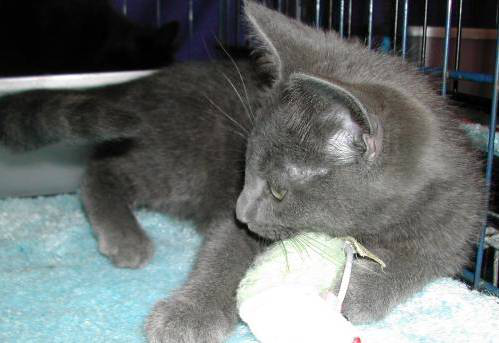

In [61]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [0]:
results_path = '/content/kaggle-drive/kaggle_competitions/'

In [0]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds' + epoch_time + '.dat', preds)
save_array(results_path + 'filenames' + epoch_time + '.dat', filenames)

In [103]:
val_batches, probs = vgg.test(path+'valid', batch_size = 100)

Found 2000 images belonging to 2 classes.


In [0]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [105]:
print(probs.shape)

(2000, 2)


In [0]:
from numpy.random import random, permutation

In [0]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

Found 1851 correct labels


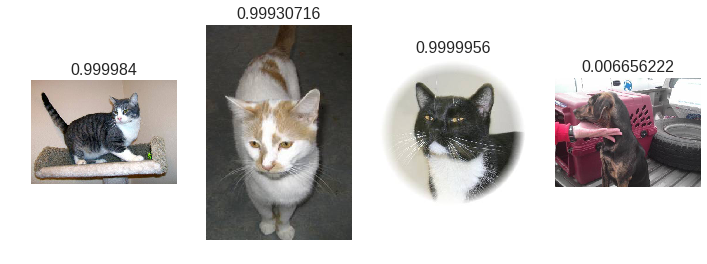

In [106]:
#Number of images to view for each visualization task
n_view = 4

#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 149 incorrect labels


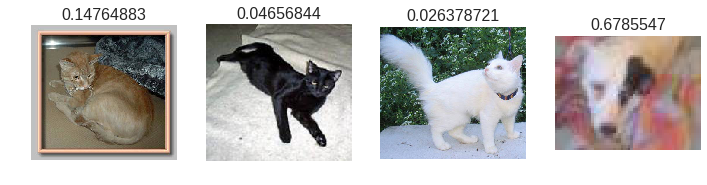

In [107]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 921 confident correct cats labels


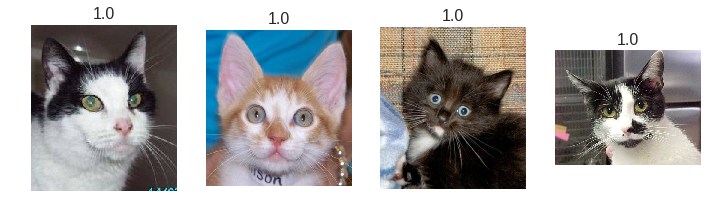

In [108]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print("Found %d confident correct cats labels" % len(correct_cats))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 930 confident correct dogs labels


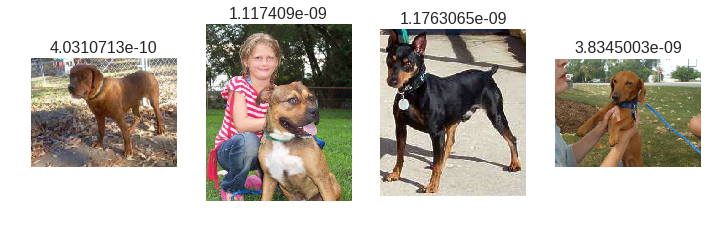

In [109]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print("Found %d confident correct dogs labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[921  79]
 [ 70 930]]


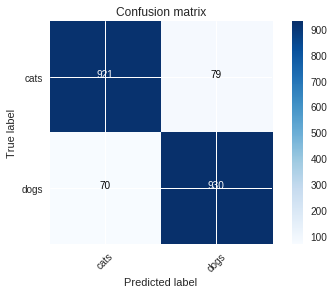

In [113]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [0]:
#Load our test predictions from file
preds = load_array(results_path + 'test_preds' + epoch_time + '.dat')
filenames = load_array(results_path + 'filenames' + epoch_time + '.dat')

In [132]:
#Grab the dog prediction column
isdog = preds[:,1]
print("Raw Predictions: " + str(isdog[:5]))
print("Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)]))
print("Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)]))

Raw Predictions: [0.9993 0.0031 0.0287 1.     0.8531]
Mid Predictions: [0.5503 0.4532 0.4061 0.4784 0.5751 0.4842 0.4564 0.4565 0.5903 0.4757 0.4105 0.5357 0.4792 0.455
 0.585  0.441  0.5137 0.5315 0.566  0.5443 0.4206 0.4281 0.4553 0.5413 0.5157 0.5273 0.4834 0.5279
 0.4955 0.4451 0.5875 0.5764 0.4257 0.4145 0.5437 0.4963 0.4779 0.5266 0.55   0.4885 0.4899 0.461
 0.515  0.573  0.5733 0.5604 0.5133 0.4207 0.4549 0.4229 0.4949 0.5767 0.4584 0.5935 0.5231 0.5722
 0.5338 0.4349 0.4787 0.5757 0.431  0.482  0.4636 0.5524 0.5673 0.4093 0.4946 0.4451 0.5673 0.4276
 0.4534 0.4752 0.4321 0.449  0.45   0.451  0.5851 0.4128 0.5835 0.4695 0.5143 0.4197 0.5355 0.4894
 0.5862 0.574  0.4784 0.5926 0.5886 0.5828 0.5207 0.5347 0.5158 0.4961 0.547  0.4504 0.482  0.5404
 0.4189 0.5574 0.5508 0.5119 0.4669 0.5953 0.4776 0.5816 0.5484 0.5134 0.4247 0.5063 0.5675 0.4974
 0.4114 0.4666 0.5992 0.4472 0.519  0.5438 0.496  0.5477 0.4197 0.5844 0.4713 0.5668 0.5488 0.4596
 0.461  0.5256 0.4928 0.5822 0.4267 0.52

In [0]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.025, max=0.975)

In [0]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [135]:
print(ids.shape)
print(isdog.shape)

(12500,)
(12500,)


In [136]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[1.0000e+00, 9.7500e-01],
       [1.0000e+01, 2.5000e-02],
       [1.0000e+02, 2.8676e-02],
       [1.0000e+03, 9.7500e-01],
       [1.0000e+04, 8.5314e-01]])

In [0]:
submission_file_name = 'submission'+ epoch_time +'.csv'
np.savetxt(results_path+submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')